# Cuantificacion | Semana 3 clase 19-03
## ADC
Un ADC (Convertidor Analógico a Digital) transforma señales analógicas (continuas) en digitales (discontinuas) mediante muestreo, cuantización y codificación. Su precisión depende de la resolución (bits) y la frecuencia de muestreo. 

**miniresumen :)** 

El ruido analógico es interferencia aleatoria generada por fuentes térmicas (movimiento de electrones), interferencias electromagnéticas o imperfecciones de circuitos. Aparece en todas las frecuencias con distribución gaussiana. 

El ruido de cuantización surge al convertir señales analógicas a digitales, cuando el ADC aproxima los valores continuos a niveles discretos, creando un error uniforme entre -q/2 y q/2. 

Mientras el ruido analógico es externo e inevitable, el de cuantización es inherente al proceso de digitalización y depende del número de bits del ADC.

## Normalización de Señal para Potencia Unitaria

La señal de entrada **x(t)** debe normalizarse para alcanzar potencia $ P = 1$.

### Caso Sinusoidal
Para una señal sinusoidal $\to  P = \left( \frac{A}{\sqrt{2}}\right)^2 $
Para $ P = 1   \to  A = \sqrt{2} $

Si la señal existe con $ A \neq \sqrt{2} $, requiere normalización.

---

### Normalización General

#### 1. Señal con media no nula $ \mu \neq 0 $
**Potencia:**
$$ P = \frac{1}{N} \sum_{n=0}^{N-1} (x[n] - \mu)^2 $$

**Proceso:**
1. Centrar: $ x_{\text{cent}}[n] = x[n] - \mu $
2. Calcular $ \sigma = \sqrt{P} $
3. Normalizar:
$$ x_{\text{norm}}[n] = \frac{x_{\text{cent}}[n]}{\sigma} $$

**Resultado:**
$$ \frac{1}{N} \sum_{n=0}^{N-1} x_{\text{norm}}[n]^2 = 1 $$

---

#### 2. Señal con media cero $ \mu = 0 $
**Potencia = Varianza:**
$$ P = \sigma^2 = \frac{1}{N} \sum_{n=0}^{N-1} x[n]^2 $$

**Normalización directa:**
$$ x_{\text{norm}}[n] = \frac{x[n]}{\sigma} $$

**Resultado:**
$$ \frac{1}{N} \sum_{n=0}^{N-1} x_{\text{norm}}[n]^2 = \frac{P}{\sigma^2} = 1 $$

---



### Creo mi señal no normalizada para normalizarla 

La potencia de mi señal es:  84.5
Luego de normalizar, la potencia de mi señal es:  1.0000000000000002


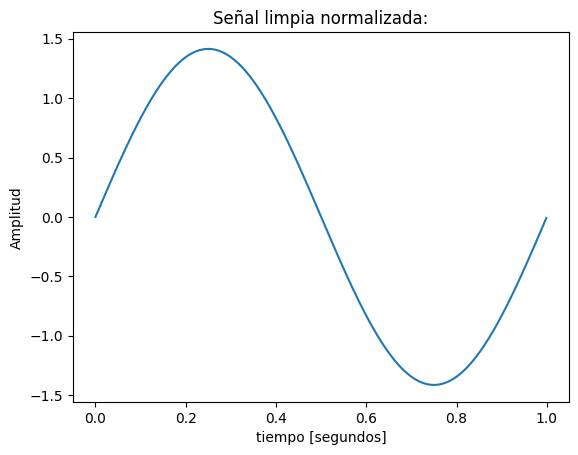

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

def generador_sen(vmax, dc, ff, ph, nn, fs):
    '''
    Esta funcion genera una señal senoidal.
    descripcion de los parametros:
    vmax:amplitud max de la senoidal [Volts]
    dc:valor medio [Volts]
    ff:frecuencia [Hz]
    ph:fase en [rad]
    nn:cantidad de muestras
    fs:frecuencia de muestreo [Hz]
    '''
    Ts= 1/fs
    tt=np.linspace(0,(nn-1)*Ts,nn)
    xx=vmax*np.sin(2*np.pi*ff*tt+ph)+dc
    return tt, xx
    
N= 1000
fs = 1000
ff = 1
A_inicial = 13 #puse cualquier cosa, total luego voy a normalizar
tt, xx = generador_sen(A_inicial, 0, ff, 0, N, fs)

print ('La potencia de mi señal es: ',np.var(xx)) #Ya que por ser una señal senoideal con media cero la potencia es la varianza
xn=xx/np.std(xx) #divido a mi señal por el desvio estandar para normalizarla
print ('Luego de normalizar, la potencia de mi señal es: ',np.var(xn)) #Ya que por ser una señal senoideal con media cero la potencia es la varianza
plt.figure(1)
plt.plot(tt,xn) 
plt.title("Señal limpia normalizada:")
plt.xlabel("tiempo [segundos]")
plt.ylabel("Amplitud")
plt.show()

## ADC

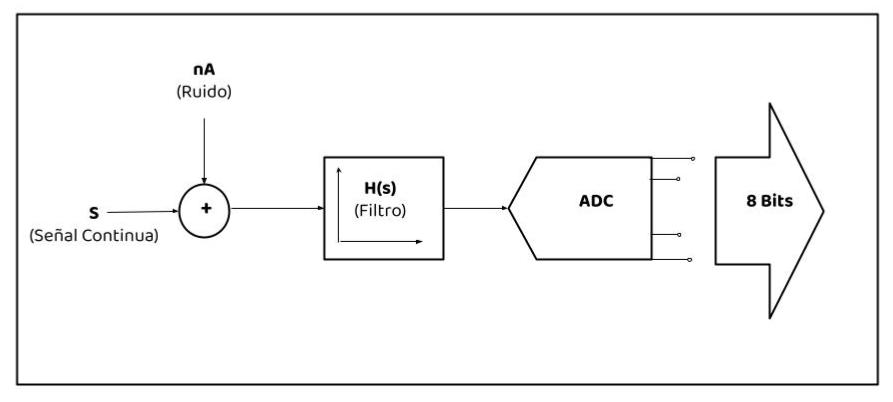

In [5]:
from IPython.display import Image, display
image_path = r"C:\Users\Notebook\Downloads\diagrama.JPG"
display(Image(filename=image_path))

In [2]:
B =  8# bits
Vf = 1.5# rango simétrico de +/- Vf Volts
q = 2*Vf/(2**B) # paso de cuantización de q Volts

# datos del ruido (potencia de la señal normalizada, es decir 1 W)
pot_ruido_cuant = (q**2 ) / 12 # Watts 
kn = 1. # escala de la potencia de ruido analógico
pot_ruido_analog = pot_ruido_cuant * kn 
print('Potencia del ruido analogica: ', pot_ruido_analog)


Potencia del ruido analogica:  1.1444091796875e-05


## Experimento

   Se desea simular el efecto de la cuantización sobre una señal senoidal de 
   frecuencia 1 Hz. La señal "analógica" podría tener añadida una cantidad de 
   ruido gausiano e incorrelado.

   Se pide analizar el efecto del muestreo y cuantización sobre la señal 
   analógica. Para ello se proponen una serie de gráficas que tendrá que ayudar
   a construir para luego analizar los resultados.

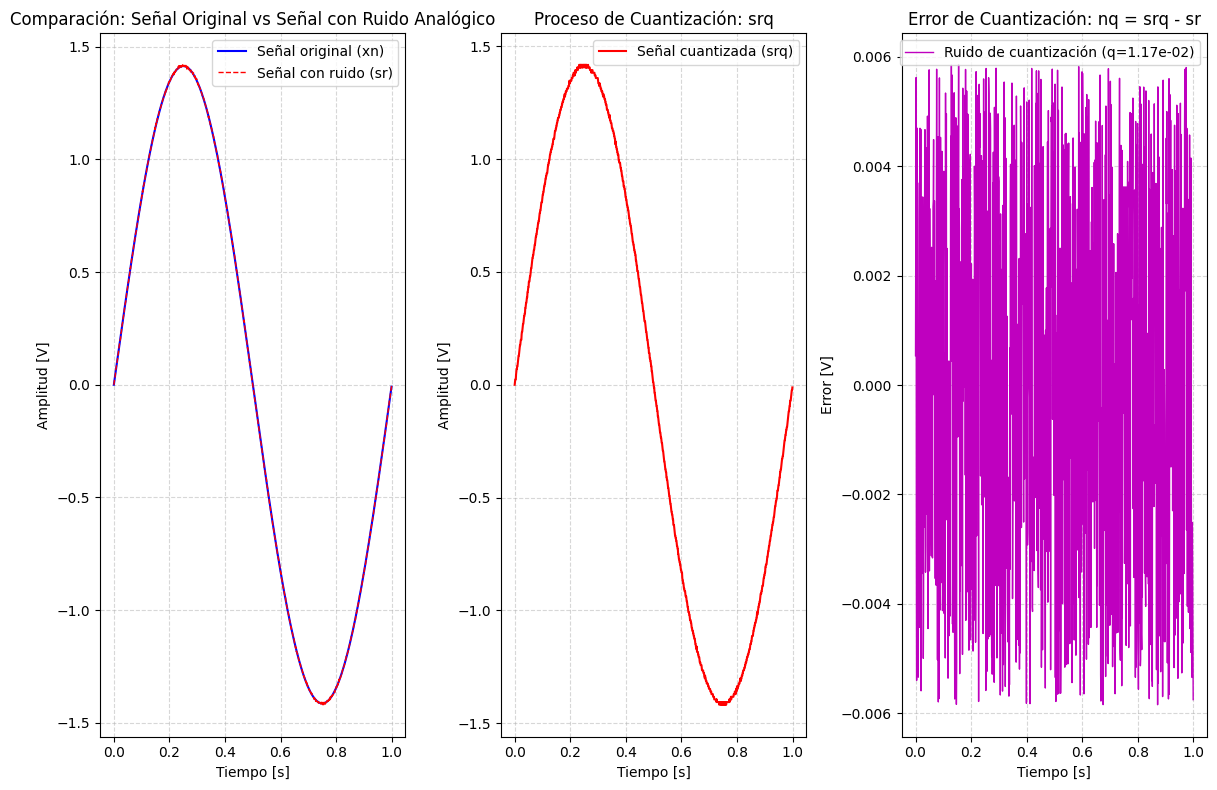

In [11]:
# Señales

analog_sig = xn # señal analogica sin ruido (normalizada)
nn = np.random.normal(0,np.sqrt(pot_ruido_analog),N) #señal de ruido analogico 
# Genera ruido gaussiano con potencia=pot_ruido_analog: σ² = P → σ = √P 

sr = xn + nn # señal analógica de entrada al ADC (con ruido analógico) (señal + ruido)
srq = np.round(sr/q)*q # señal cuantizada, (señal divida la cantidad total de bits redondeada, luego escalada por q)

nq =  srq-sr # señal de ruido de cuantización (captura el error introducido por la cuantización (pérdida de precisión al discretizar la señal))

# Configuración de la figura
plt.figure(figsize=(12, 8))

# Subplot 1: Señal analógica con ruido (sr) vs señal original (xn)
plt.subplot(1, 3, 1)
plt.plot(tt, xn, 'b-', label='Señal original (xn)', linewidth=1.5)
plt.plot(tt, sr, 'r--', label='Señal con ruido (sr)', linewidth=1)
plt.title('Comparación: Señal Original vs Señal con Ruido Analógico')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)

# Subplot 2: Señal cuantizada (srq) vs señal con ruido (sr)
plt.subplot(1, 3, 2)
#plt.plot(tt, sr, 'g-', label='Señal con ruido (sr)', linewidth=1)
plt.plot(tt, srq, 'r-', label='Señal cuantizada (srq)')  # Usar stem para discretización
plt.title('Proceso de Cuantización: srq')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)

# Subplot 3: Ruido de cuantización (nq)
plt.subplot(1, 3, 3)
plt.plot(tt, nq, 'm-', label=f'Ruido de cuantización (q={q:.2e})', linewidth=1)
plt.title('Error de Cuantización: nq = srq - sr')
plt.xlabel('Tiempo [s]')
plt.ylabel('Error [V]')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)

# Ajustar espaciado
plt.tight_layout()
plt.show()


## Espectro

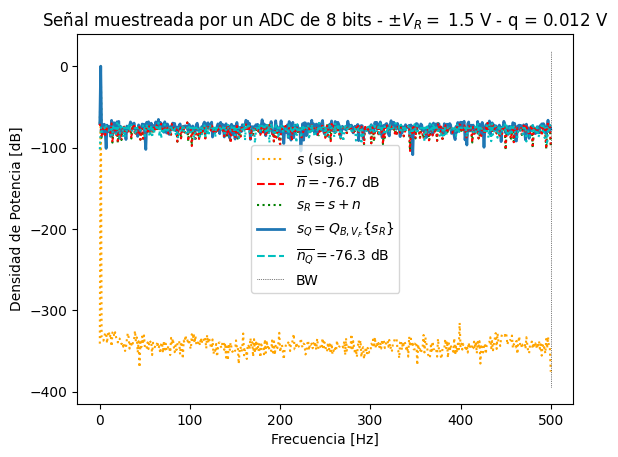

In [ ]:
plt.figure(4)
df = fs/N # resolución espectral: 1hz
ft_SR = 1/N * np.fft.fft(sr)      # FFT de la señal con ruido analógico
ft_Srq = 1/N * np.fft.fft(srq)    # FFT de la señal cuantizada
ft_As = 1/N * np.fft.fft(analog_sig)  # FFT de la señal original (sin ruido)
ft_Nq = 1/N * np.fft.fft(nq)      # FFT del ruido de cuantización
ft_Nn = 1/N * np.fft.fft(nn)      # FFT del ruido analógico

ff = np.linspace(0, (N-1)*df, N)  # Eje frecuencial desde 0 Hz hasta fs-df (osea 0, 1, 2, ... 999hz)
bfrec = ff <= fs/2                 # Mascara para frecuencias <= fs/2 (Nyquist)  (evita redundancia por simetría de la FFT).

Nnq_mean = np.mean(np.abs(ft_Nq)**2)  # Potencia media del ruido de cuantización
nNn_mean = np.mean(np.abs(ft_Nn)**2)  # Potencia media del ruido analógico



#bfrec es un bool que va de cero a fc/2 (osea me quedo con la mitad del vector)
# hago eso por que es reddundante. por la simetria de fourier. v¿en e video de youtube 
#se ve como tanto en fase como en modulo es simetrica o antisimetrica. es redundante 
#quedarme con ambos lados

plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_As[bfrec])**2), color='orange', ls='dotted', label='$ s $ (sig.)' )
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([nNn_mean, nNn_mean]) ), '--r', label= '$ \overline{n} = $' + '{:3.1f} dB'.format(10* np.log10(2* nNn_mean)) )
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_SR[bfrec])**2), ':g', label='$ s_R = s + n $' )
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Srq[bfrec])**2), lw=2, label='$ s_Q = Q_{B,V_F}\{s_R\}$' )
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([Nnq_mean, Nnq_mean]) ), '--c', label='$ \overline{n_Q} = $' + '{:3.1f} dB'.format(10* np.log10(2* Nnq_mean)) )
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Nn[bfrec])**2), ':r')
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Nq[bfrec])**2), ':c')
plt.plot( np.array([ ff[bfrec][-1], ff[bfrec][-1] ]), plt.ylim(), ':k', label='BW', lw = 0.5  )

plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q) )
plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
axes_hdl = plt.gca()
axes_hdl.legend()


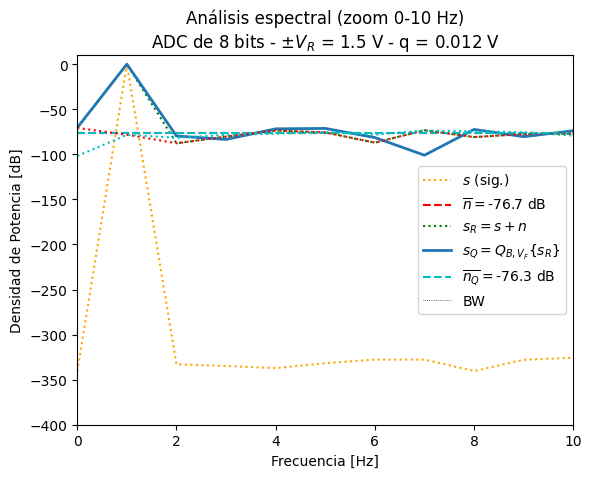

In [16]:
plt.figure(5)
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_As[bfrec])**2), color='orange', ls='dotted', label='$ s $ (sig.)' )
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([nNn_mean, nNn_mean]) ), '--r', label= '$ \overline{n} = $' + '{:3.1f} dB'.format(10* np.log10(2* nNn_mean)) )
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_SR[bfrec])**2), ':g', label='$ s_R = s + n $' )
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Srq[bfrec])**2), lw=2, label='$ s_Q = Q_{B,V_F}\{s_R\}$' )
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([Nnq_mean, Nnq_mean]) ), '--c', label='$ \overline{n_Q} = $' + '{:3.1f} dB'.format(10* np.log10(2* Nnq_mean)) )
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Nn[bfrec])**2), ':r')
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Nq[bfrec])**2), ':c')
plt.plot( np.array([ ff[bfrec][-1], ff[bfrec][-1] ]), plt.ylim(), ':k', label='BW', lw = 0.5  )

plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q) )
plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')

plt.xlim(0, 10)  # Límite para zoom entre 0-10 Hz
plt.ylim(-400, 10)  # Ajuste opcional del eje Y para mejor visualización

# Detalles estéticos
plt.title('Análisis espectral (zoom 0-10 Hz)\nADC de {:d} bits - $\\pm V_R$ = {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q))


axes_hdl = plt.gca()
axes_hdl.legend()

### Descripcion de las variables del grafico

**$S$**: Espectro de la señal analógica SIN ruido ni cuantización

**$ \overline{n} $**: Potencia media del ruido analógico

**$s_R$**: Señal con ruido. muestra como el ruido analogico afecta el espectro

**$s_Q$**: Señal cuantizada  Resultado de pasar $ s_R $ por un ADC.

   - Efecto visible: "Piso" de ruido adicional por cuantización.


**$\overline{n_Q}$**: Potencia media del ruido de cuantización 

**$BW$***: Limite de Nyquist, limite de frecuancia maxima representada. 

